# Trajectory statistics

## INFO!
Die Klasse "unclassified" bedeuted, dass diesen Fragmenten manuell noch keine Klasse zugeordnet wurde. Aktuell fallen darunter alle Aufnahmen der Uni Münster, außer "3_m-h-h" bzw. "mu-3".


In [281]:
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

## Load statistics

In [282]:

FIGURE_OUTPUT_DIR = Path("output/figures/statistics")
FIGURE_OUTPUT_DIR.mkdir(exist_ok=True)

# To generate a new stats file run the script save_trajectory_proj_and_stats.py!
STATS_BASE_DIR = Path("output/statistics/hist/")

# contains segmented mu trajectories; Will be counted as class "unclassified"
separated_mu = pd.read_csv(STATS_BASE_DIR / "tf100ms_2_separated_mu" / "all_fragments.csv")

# contains classified trajectories
classified = pd.read_csv(STATS_BASE_DIR / "tf100ms_2024-08-07_15-43-43" / "all_fragments.csv")

print(separated_mu.columns)
print(classified.columns)

display(classified)

Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')
Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')


,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,mu-3,0,0,bee,217225,30.25,2748,0.1
1,mu-3,0,1,bee,217225,30.25,1602,0.1
2,mu-3,0,2,bee,217225,30.25,881,0.1
3,mu-3,0,3,bee,217225,30.25,977,0.1
4,mu-3,0,4,bee,217225,30.25,690,0.1
...,...,...,...,...,...,...,...,...
8261,hn-was-3,9,30,wasp,10491,3.47,374,0.1
8262,hn-was-3,9,31,wasp,10491,3.47,259,0.1
8263,hn-was-3,9,32,wasp,10491,3.47,374,0.1
8264,hn-was-3,9,33,wasp,10491,3.47,323,0.1


In [283]:
# clear class names for datasets not yet classified
separated_mu["class"] = "unclassified"
display(separated_mu.head())

,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,mu-1,0,0,unclassified,1015970,40.43,43,0.1
1,mu-1,0,1,unclassified,1015970,40.43,14,0.1
2,mu-1,0,2,unclassified,1015970,40.43,290,0.1
3,mu-1,0,3,unclassified,1015970,40.43,630,0.1
4,mu-1,0,4,unclassified,1015970,40.43,450,0.1


In [284]:
# Combine dataframes
classified_scenes = classified["scene"].unique()
unclassified_mu = separated_mu[~separated_mu["scene"].isin(classified_scenes)]
df = pd.concat([classified, unclassified_mu])

print("total number of fragments:", len(df.index))
print("total number of classified fragments:", len(classified.index))
print("unclassified mu scenes:", unclassified_mu["scene"].unique())
print("mu total fragments:", len(separated_mu.index), ", mu unclassified fragments:", len(unclassified_mu.index))

# combine all
# df = pd.concat([combined_mu, classified_pf])
# display(df["scene"].unique())
# print("Total fragment count:", len(df))

total number of fragments: 11574
total number of classified fragments: 8266
unclassified mu scenes: ['mu-1' 'mu-2' 'mu-4' 'mu-5' 'mu-6']
mu total fragments: 6383 , mu unclassified fragments: 3308


## Class overview
### Number of trajectories per class

class
bee              65
bumblebee         5
butterfly        22
dragonfly       112
insect           70
unclassified    152
wasp             21
dtype: int64

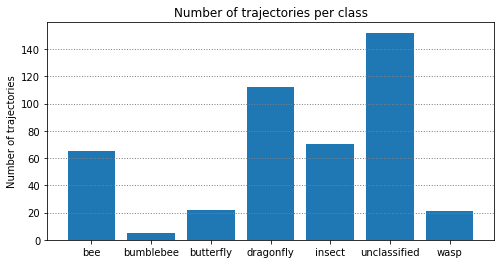

In [285]:
# gesucht: Anzahl instances pro Klasse
# group by class
# unique over scene and instance_id
df1 = df.groupby("class").apply(lambda x: len(x[["scene", "instance_id"]].drop_duplicates()))
display(df1)

plt.figure(figsize=(8,4))
plt.bar(df1.index, df1)
plt.title("Number of trajectories per class")
plt.ylabel("Number of trajectories")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of trajectories per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

## Number of Fragments

### Number of fragments per class (all)

class
bee             3671
bumblebee        206
butterfly       1078
dragonfly       2160
insect           527
unclassified    3308
wasp             624
dtype: int64

total fragments: 11574


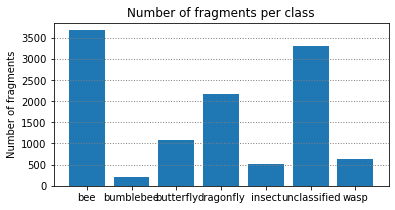

In [286]:
df1 = df.groupby("class").size()
display(df1)
print("total fragments:", df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (< 2048)

class
bee             3359
bumblebee        146
butterfly        853
dragonfly       1261
insect           417
unclassified    2711
wasp             601
dtype: int64

total fragments: 9348


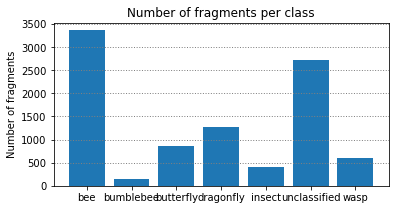

In [287]:
df1 = df[df["frag_evnt_count"] < 2048].groupby("class").size()
display(df1)
print("total fragments:", df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (2048 <= n <= 4096)

class
bee             187
bumblebee        42
butterfly       141
dragonfly       493
insect           54
unclassified    123
wasp             17
dtype: int64

total fragments: 1057


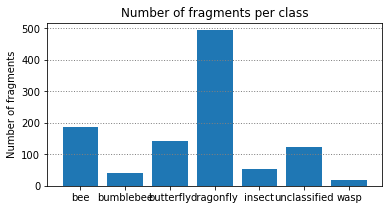

In [288]:
df1 = df[(df["frag_evnt_count"] >= 2048) & (df["frag_evnt_count"] <= 2048*2)].groupby("class").size()
display(df1)
print("total fragments:", df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

### Number of fragments per class (> 4096)

class
bee             125
bumblebee        18
butterfly        84
dragonfly       406
insect           56
unclassified    474
wasp              6
dtype: int64

total fragments: 1169


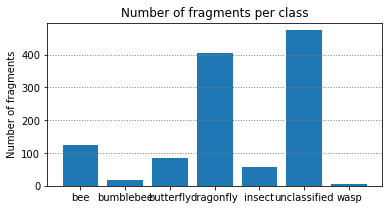

In [298]:
df1 = df[df["frag_evnt_count"] > 4096].groupby("class").size()
display(df1)
print("total fragments:", df1.sum())

plt.figure(figsize=(6,3))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Number of fragments per class.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

## Fragment event count

In [290]:
df0 = df[["frag_evnt_count","frag_len_s"]]

df1 = df0.mean()
print("Mean overall values (all fragments)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 2048].mean()
print("Mean overall values (>= 2048)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].mean()
print("Mean overall values (>= 4096)")
display(df1)

df1 = df0[df0["frag_evnt_count"] >= 4096].median()
print("Median overall values (>= 4096)")
display(df1)

Mean overall values (all fragments)


frag_evnt_count    2564.17
frag_len_s            0.10
dtype: float64

Mean overall values (>= 2048)


frag_evnt_count    11748.34
frag_len_s             0.10
dtype: float64

Mean overall values (>= 4096)


frag_evnt_count    19731.17
frag_len_s             0.10
dtype: float64

Median overall values (>= 4096)


frag_evnt_count    8305.0
frag_len_s            0.1
dtype: float64

## Fragment event count per class

In [291]:

df1 = df.groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (all fragments)")
display(df1["frag_evnt_count"])

df1 = df[(df["frag_evnt_count"] < 2048)].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (n < 2048)")
display(df1["frag_evnt_count"])

df2 = df[(df["frag_evnt_count"] >= 2048) & (df["frag_evnt_count"] <= 4096)].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (2048 <= n <= 4096)")
display(df2["frag_evnt_count"])

df3 = df[df["frag_evnt_count"] > 4096].groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
print("Mean fragment event count per class (> 4096)")
display(df3["frag_evnt_count"])

Mean fragment event count per class (all fragments)


class
bee              627.35
bumblebee       1543.69
butterfly       2152.59
dragonfly       2698.74
insect          3355.21
unclassified    5068.60
wasp             595.74
Name: frag_evnt_count, dtype: float64

Mean fragment event count per class (n < 2048)


class
bee             277.70
bumblebee       715.66
butterfly       576.26
dragonfly       801.22
insect          459.04
unclassified    183.47
wasp            495.68
Name: frag_evnt_count, dtype: float64

Mean fragment event count per class (2048 <= n <= 4096)


class
bee             2864.82
bumblebee       2992.67
butterfly       2934.14
dragonfly       2974.06
insect          2860.07
unclassified    2805.54
wasp            2658.12
Name: frag_evnt_count, dtype: float64

Mean fragment event count per class (> 4096)


class
bee              6675.86
bumblebee        4879.06
butterfly       16847.99
dragonfly        8257.96
insect          25398.82
unclassified    33595.96
wasp             4775.50
Name: frag_evnt_count, dtype: float64

## Trajectory stats

Mean number of events per trajectory per class


class
bee             119638.08
bumblebee       163819.53
butterfly        91796.70
dragonfly       159678.38
insect           22317.00
unclassified    253707.81
wasp             42204.96
Name: traj_evnt_count, dtype: float64

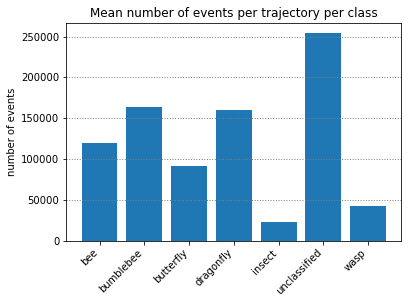

Mean trajectory length (s) per class


class
bee             18.98
bumblebee       13.42
butterfly        8.75
dragonfly       10.62
insect           1.50
unclassified    16.31
wasp             7.43
Name: traj_len_s, dtype: float64

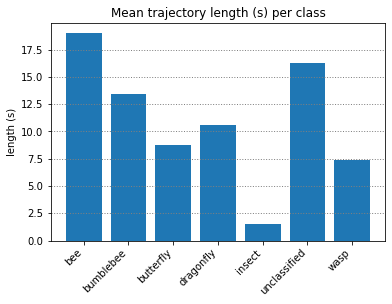

Mean number of events per fragment per class


class
bee             277.70
bumblebee       715.66
butterfly       576.26
dragonfly       801.22
insect          459.04
unclassified    183.47
wasp            495.68
Name: frag_evnt_count, dtype: float64

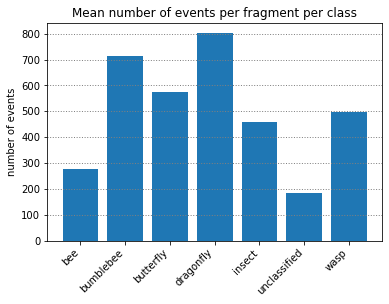

In [292]:
print("Mean number of events per trajectory per class")
display(df1["traj_evnt_count"])
plt.bar(df1.index, df1["traj_evnt_count"])
plt.title("Mean number of events per trajectory per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

print("Mean trajectory length (s) per class")
display(df1["traj_len_s"])
plt.bar(df1.index, df1["traj_len_s"])
plt.title("Mean trajectory length (s) per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("length (s)")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

print("Mean number of events per fragment per class")
display(df1["frag_evnt_count"])
plt.bar(df1.index, df1["frag_evnt_count"])
plt.title("Mean number of events per fragment per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


## Event count / Fragment count histogram

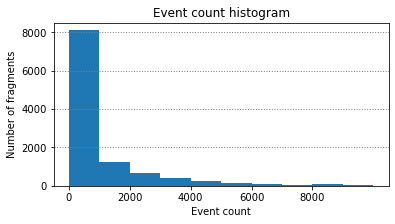

In [293]:
plt.figure(figsize=(6,3))
plt.hist(df["frag_evnt_count"], bins=list(range(0, 1000*10+1, 1000)))
plt.title("Event count histogram")
plt.xlabel("Event count")
plt.xticks(np.arange(0, 1000*10, 2000))
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Event count histogram 2.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

## Number of Fragments per scene

### >= 0

scene
hn-bee-1      610
hn-but-2     1213
hn-dra-1      216
hn-was-1       70
hn-was-2      327
hn-was-3      227
mb-bum2-2     582
mb-dra1-1     518
mb-dra2-1    1428
mu-1         1112
mu-2          590
mu-3         3075
mu-4          518
mu-5           61
mu-6         1027
dtype: int64

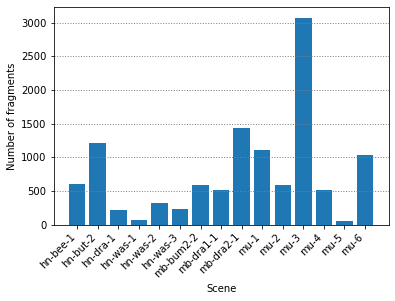

In [294]:
# number of fragments per scene
df1 = df.groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Scene")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


### >= 2048

scene
hn-bee-1      15
hn-but-2     286
hn-dra-1      98
hn-was-1       2
hn-was-2       9
hn-was-3      12
mb-bum2-2    135
mb-dra1-1    266
mb-dra2-1    537
mu-1         430
mu-2         110
mu-3         269
mu-4          25
mu-6          32
dtype: int64

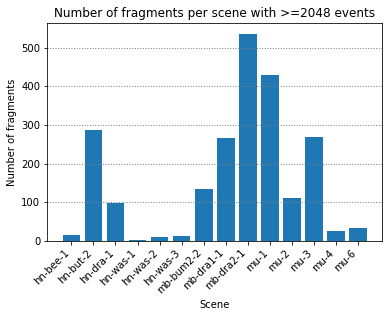

In [295]:
# number of fragments per scene WHERE >= 2048
df1 = df[df["frag_evnt_count"] >= 4096//2 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=2048 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

### >= 4096

scene
hn-bee-1       3
hn-but-2     121
hn-dra-1      46
hn-was-2       3
hn-was-3       3
mb-bum2-2     39
mb-dra1-1    133
mb-dra2-1    229
mu-1         373
mu-2          75
mu-3         118
mu-4           4
mu-6          22
dtype: int64

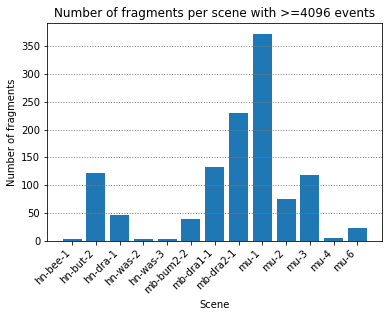

In [296]:
# number of fragments per scene WHERE >= 4096
df1 = df[df["frag_evnt_count"] >= 4096 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=4096 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

### Number of Fragments per Instance

In [297]:
df1 = df[df["frag_evnt_count"] >= 2048 ].groupby(["scene","instance_id"]).size().sort_values()

print(df1.mean())
print(df1.median())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df1)

9.160493827160494
5.0


scene      instance_id
hn-bee-1   0                1
hn-dra-1   9                1
mb-bum2-2  0                1
           9                1
           39               1
           45               1
           47               1
mb-dra1-1  17               1
           49               1
           70               1
mb-dra2-1  13               1
           15               1
           16               1
           26               1
           32               1
hn-but-2   36               1
mb-dra2-1  36               1
mu-1       21               1
           26               1
           27               1
           28               1
           29               1
mu-2       15               1
mu-3       21               1
           22               1
           33               1
           63               1
           64               1
mu-4       14               1
mu-6       16               1
           87               1
mu-1       4                1
hn-but-2   30    